<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Import các thư viện cần thiết

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
# Đọc dữ liệu từ CSV
df = pd.read_csv('../Data/who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi


### Câu 1

### Câu 2

### Câu 3 Các yếu tố về giáo dục ảnh hưởng đến tuổi thọ trung bình ở các quốc gia như thế nào? Liệu sự thay đổi về tỉ lệ biết chữ ở các quốc gia có ảnh hưởng đến sự thay đổi về tuổi thọ trung bình hay không, vì sao?

Để trả lời câu hỏi trên ta thực hiện các bước sau: 
   - Đầu tiên tạo chọn các cột liên quan đến các yếu tố giáo dục và loại bỏ các giá trị còn thiếu
   - Vẽ biểu đồ scatteplot cho các mối tương quan
   - Vẽ heatmap để thấy được mức độ tương quan giữa các đại lượng với tuổi thọ trung bình

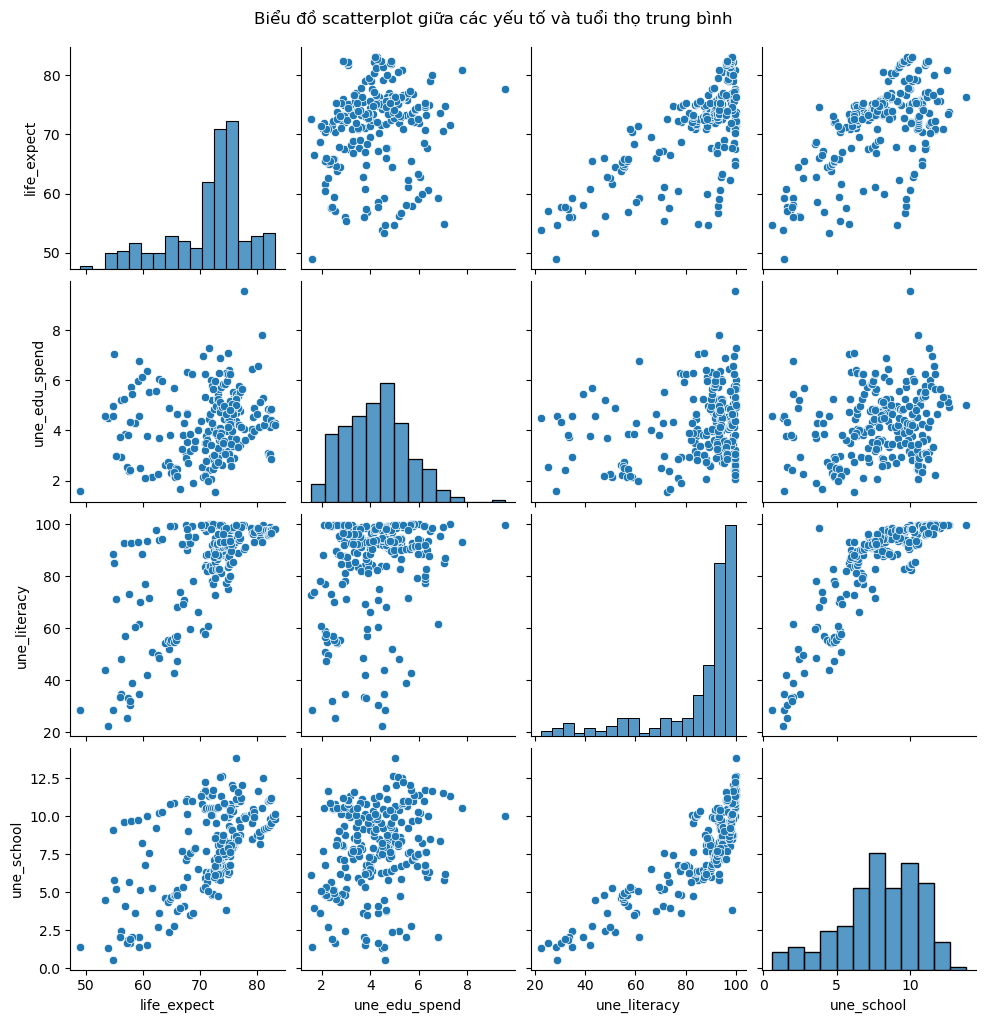

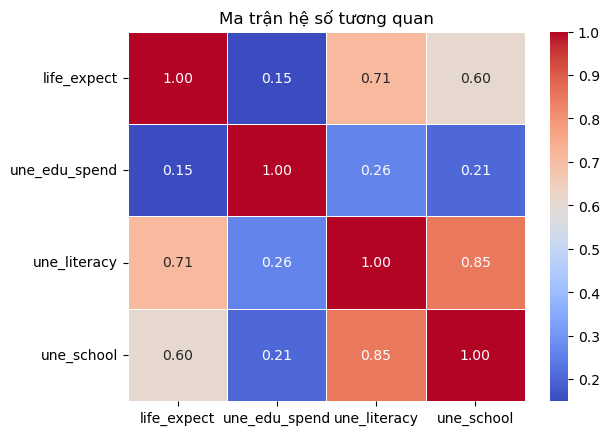

In [15]:
import warnings

# Tắt cảnh báo của Seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore")
selected_columns = ['country', 'year', 'life_expect', 'une_edu_spend', 'une_literacy', 'une_school']

# Tạo DataFrame mới với các cột đã chọn và loại bỏ dòng có giá trị thiếu
df_selected = df[selected_columns].dropna()

# Vẽ biểu đồ scatterplot cho mối tương quan
sns.pairplot(df_selected, vars=['life_expect', 'une_edu_spend', 'une_literacy', 'une_school'])
plt.suptitle('Biểu đồ scatterplot giữa các yếu tố và tuổi thọ trung bình', y=1.02)
plt.show()

# Tính ma trận hệ số tương quan
correlation_matrix = df_selected[['life_expect', 'une_edu_spend', 'une_literacy', 'une_school']].corr()

# Vẽ heatmap của ma trận hệ số tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận hệ số tương quan')
plt.show()


Nhìn vào biểu đồ trên ta có một số nhận xét sau:
   - Tỉ lệ biết chữ và tỉ lệ người 25 tuổi tham gia các lớp học có tỉ lệ tương quan cao so với tuổi thọ trung bình
   - Tỉ lệ đầu tư vào giáo dục có vẻ không ảnh hưởng nhiều tới tuổi thọ trung bình ở các quốc gia
   - Biểu đồ cho thấy tỉ lệ biết chữ tăng thì tuổi thọ trung bình tăng
   
Để làm rõ hơn nhận định này ta sẽ xem xét sự thay đổi tuổi thọ trung bình ở 20 quốc gia có tỉ lệ biết chữ sao nhất:
   - Đầu tiên ta chọn những cột cần phân tích
   - Tính tỉ lệ biết chữ trung bình qua các năm và chọn ra 20 quốc gia có tỉ lệ biết chữ trung bình cao nhất
   - Tinh chỉnh dữ liệu và vẽ biểu đồ đường theo khoảng cách là 4 năm


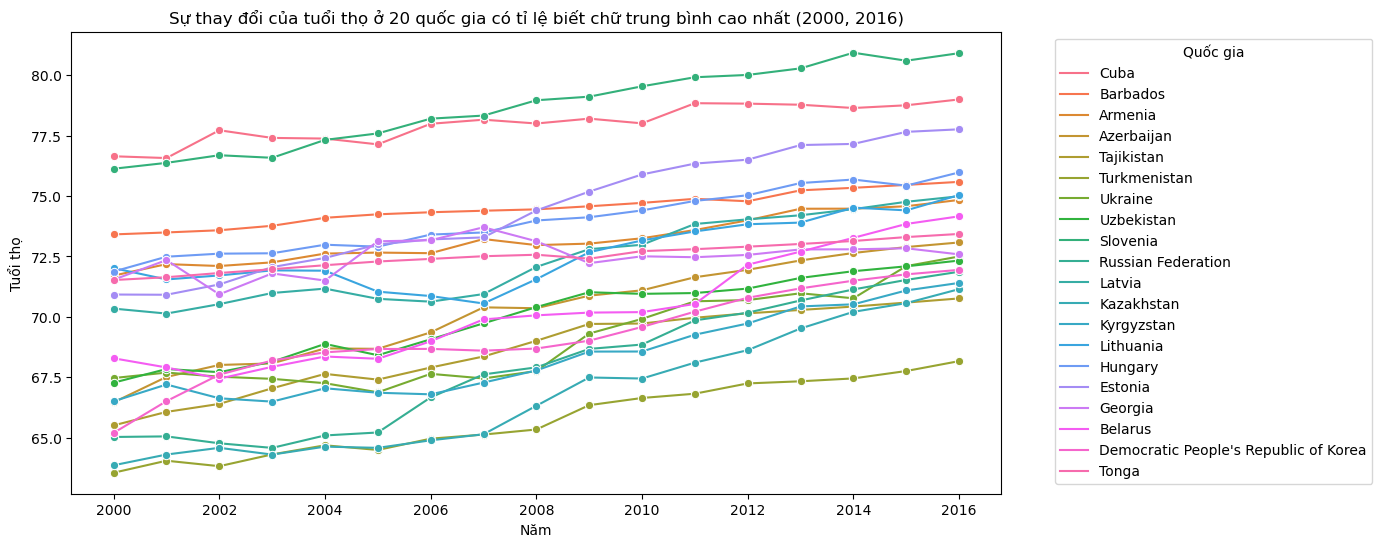

In [16]:
selected_columns = ['country', 'year', 'life_expect', 'une_literacy']

# Lấy 20 quốc gia có tỉ lệ biết chữ trung bình cao nhất
top_20_countries = df.groupby('country')['une_literacy'].mean().nlargest(20).index

# Lọc dữ liệu cho 20 quốc gia đó
df_top_countries = df[df['country'].isin(top_20_countries)]

# Chia dữ liệu thành các khoảng 4 năm
df_top_countries['year_interval'] = pd.cut(df_top_countries['year'], bins=range(2000,2016, 4), right=False)

# Vẽ biểu đồ lineplot cho sự thay đổi tuổi thọ theo năm
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='life_expect', hue='country', data=df_top_countries, marker='o')
plt.title('Sự thay đổi của tuổi thọ ở 20 quốc gia có tỉ lệ biết chữ trung bình cao nhất (2000, 2016)')
plt.xlabel('Năm')
plt.ylabel('Tuổi thọ')
plt.legend(title='Quốc gia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Nhìn vào đồ thị ta thấy:
   - Tuổi thọ trung bình ở các quốc gia có tỉ lệ biết chữ trung bình cao tăng đều qua các năm
   - Do vậy, có thể nhận xét rằng tỉ lệ biết chữ có ảnh hưởng đến sự thay đổi của tuổi thọ trung bình ở các quốc gia 

In [19]:
import scipy.stats

# Assuming df là DataFrame chứa dữ liệu của bạn
# Chọn chỉ số mức độ biết chữ và tuổi thọ từ DataFrame
literacy_rate = df['une_literacy']
life_expectancy = df['life_expect']

# Loại bỏ các dòng có giá trị thiếu
df_filtered = df[['une_literacy', 'life_expect']].dropna()

# Sử dụng kiểm định tương quan Pearson
correlation, p_value = scipy.stats.pearsonr(df_filtered['une_literacy'], df_filtered['life_expect'])

# In kết quả
print(f"Mối tương quan Pearson: {correlation}")
print(f"P-value: {p_value}")

# Kiểm tra mức ý nghĩa
alpha = 0.05
if p_value < alpha:
    print("Có mối tương quan ý nghĩa giữa tỉ lệ biết chữ và tuổi thọ.")
else:
    print("Không có đủ bằng chứng để kết luận về mối tương quan giữa tỉ lệ biết chữ và tuổi thọ.")

Mối tương quan Pearson: 0.7385929117211102
P-value: 1.652910401427473e-99
Có mối tương quan ý nghĩa giữa tỉ lệ biết chữ và tuổi thọ.


### Câu 6: Số bác sĩ và số lượng bệnh viện có ảnh hưởng như thế nào đến tuổi thọ trung bình ở các quốc gia?



- Tạo dataframe mới chứa các cột dữ liệu cần xử lí
- Vẽ biểu đồ phân tán 
- Tính toán ma trận tương quan và vẽ biểu đồ heatmap để chỉ ra mức độ tương quan giữa các giá trị dữ liệu


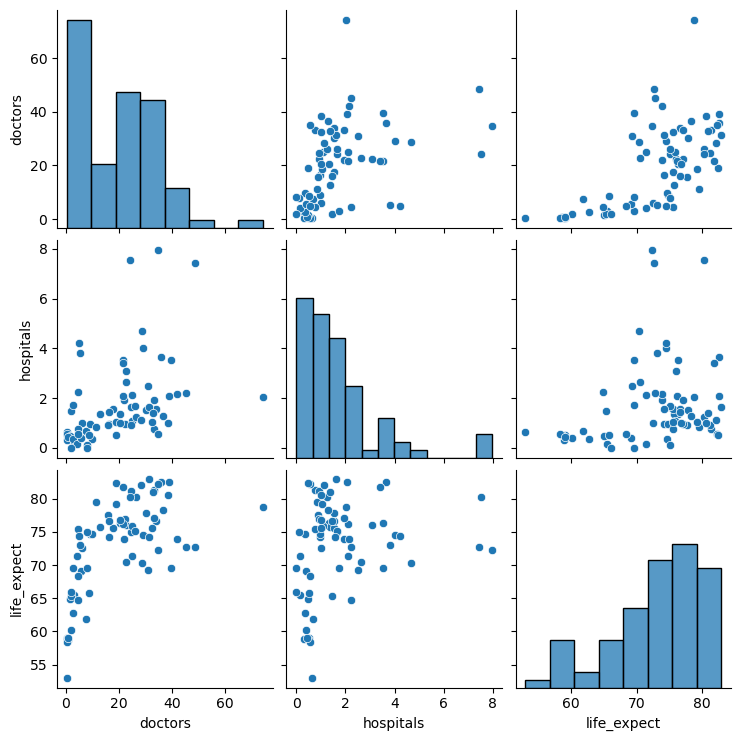

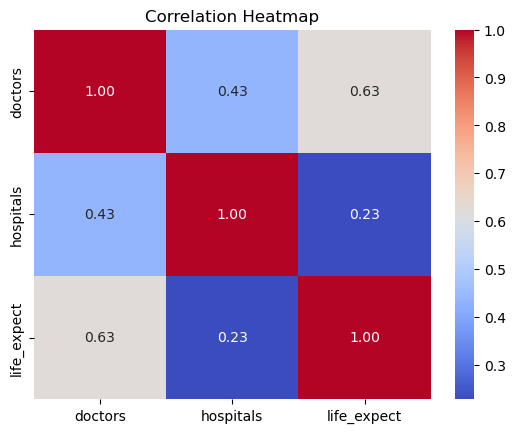

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame mới
df_infant_mortality = df[['doctors', 'hospitals', 'life_expect']].dropna()

# Vẽ biểu đồ phân tán
sns.pairplot(df_infant_mortality)
plt.show()

# Tính toán ma trận tương quan
correlation_matrix = df_infant_mortality.corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


- Dựa vào đồ thị ta có thể thấy: 
   - Số lượng bác sĩ càng ít thì tỉ lệ tử vong ở tre sơ sinh càng cao.
   - Số lượng bệnh viện càng ít thì tỉ lệ tử vong ở trẻ sơ sinh càng cao.
   - Tương tự vậy số lượng bác sĩ và bệnh viện càng tăng thì tỉ tử vong ở trẻ sơ sinh càng cảm
   - Do đó số lượng bác sĩ và bệnh viện có tương quan ngược với tỉ lệ tử vong ở trẻ sơ sinh